# Coronavirus

* Coronavirus proviene de una enfermedad animal llamada **Zoonosis**. Se transmite entre animales y personas)
* Los sintomas son: fiebre, tos, problemas respiratorios.
* En casos graves, puede causar neumonía, síndrome respiratorios agudos, fallo de los riñones e includo la muerte.

* **Novel Coronavirus (nCoV)** es una nueva cepa que no había sido identificada en humanos anteriormente.

* Causas: **SARS-COV-2** corona virus.  
* Identificado inicialmente en: **Wuhan, Hubei, China**.  
* Los primeros sintomas fueron informados en: **1 Diciember 2019**. 
* Los primeros casos están ligados al contacto con el Mercado de Pescado y Marisco de Huanan. China, en el que se vendían animales vivos.
* El 30 de Enero de 2020 la OMS declaró el brote the Emergencia Pública Internacional.








## Import Libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
from statistics import mean 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from fbprophet import Prophet
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)






Bad key "text.kerning_factor" on line 4 in
/home/emi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Import the data (make sure you update this on a daily basis)

In [3]:
# New
# https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv')

# Singapore data

In [4]:
# Singapore dataframes
singapore_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Singapore']
singapore_deaths_df = deaths_df[deaths_df['Country/Region']=='Singapore']
singapore_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Singapore']

In [5]:
# Group Singapore by Country/Region 
singapore_group_confirmed_df = singapore_confirmed_df.groupby('Country/Region').sum()
singapore_group_recoveries_df = singapore_recoveries_df.groupby('Country/Region').sum()
singapore_group_deaths_df = singapore_deaths_df.groupby('Country/Region').sum()


In [6]:
cols = singapore_confirmed_df.keys()

In [7]:
# Get columns with number of cases
singapore_confirmed = singapore_group_confirmed_df.loc[:, cols[4]:cols[-1]]
singapore_deaths = singapore_group_recoveries_df.loc[:, cols[4]:cols[-1]]
singapore_recoveries = singapore_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [8]:
# Transpose data
singapore_confirm_trans = singapore_confirmed.transpose()
singapore_recoveries_trans = singapore_recoveries.transpose()
singapore_deaths_trans = singapore_deaths.transpose()

In [9]:
singapore_confirm_trans.tail()

Country/Region,Singapore
4/1/20,1000
4/2/20,1049
4/3/20,1114
4/4/20,1189
4/5/20,1309


# China data

In [10]:
# China dataframes
china_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='China']
china_deaths_df = deaths_df[deaths_df['Country/Region']=='China']
china_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='China']

In [11]:
# Group China by Country/Region 
china_group_confirmed_df = china_confirmed_df.groupby('Country/Region').sum()
china_group_recoveries_df = china_recoveries_df.groupby('Country/Region').sum()
china_group_deaths_df = china_deaths_df.groupby('Country/Region').sum()


In [12]:
cols = china_confirmed_df.keys()

In [13]:
# Get columns with number of cases
china_confirmed = china_group_confirmed_df.loc[:, cols[4]:cols[-1]]
china_deaths = china_group_recoveries_df.loc[:, cols[4]:cols[-1]]
china_recoveries = china_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [14]:
# Transpose data
china_confirm_trans = china_confirmed.transpose()
china_recoveries_trans = china_recoveries.transpose()
china_deaths_trans = china_deaths.transpose()

In [15]:
china_confirm_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1/22/20 to 4/5/20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   China   75 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB


# Spain data

In [16]:
spain_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Spain']
spain_deaths_df = deaths_df[deaths_df['Country/Region']=='Spain']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Spain']

In [17]:
cols = spain_confirmed_df.keys()

Get all the dates for the outbreak

In [18]:
confirmed = spain_confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = spain_deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [19]:
# Transpose data
confirm_trans = confirmed.transpose()
recoveries_trans = recoveries.transpose()
deaths_trans = deaths.transpose()

In [20]:
# Rename column

confirm_trans.rename(columns={ confirm_trans.columns[0]: "y" }, inplace = True)
recoveries_trans.rename(columns={ recoveries_trans.columns[0]: "y" }, inplace = True)
deaths_trans.rename(columns={ deaths_trans.columns[0]: "y" }, inplace = True)


In [21]:
confirm_trans.tail()

,y
4/1/20,104118
4/2/20,112065
4/3/20,119199
4/4/20,126168
4/5/20,131646


In [22]:
recoveries_trans.describe()

,y
count,75.000000
mean,3401.813333
std,8331.484065
min,0.000000
25%,0.000000
50%,2.000000
75%,1054.500000
max,38080.000000


## Filtering data

The first significant date with data is '3/1/20', so let

In [23]:
first_day = '3/1/20'
last_day = confirm_trans.index[-1]
print(first_day, last_day)
# Confirmed cases
confirm_trans_filter = confirm_trans.loc[first_day:last_day]

# Recovered cases
recoveries_trans_filter = recoveries_trans.loc[first_day:last_day]

# Death cases
deaths_trans_filter = deaths_trans.loc[first_day:last_day]

# Counting days
n_days = confirm_trans_filter.count()

3/1/20 4/5/20


### Ratio recovered/confirmed cases

In [24]:
rc = recoveries_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio recuperados/casos confirmados:', rc, '%')

Ratio recuperados/casos confirmados: 28.926059280190813 %


### Ratio deaths/confirmed cases

In [25]:
rd = deaths_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio muertes/casos confirmados:', rd, '%')

Ratio muertes/casos confirmados: 9.602266684897376 %


### Plot cases in Spain

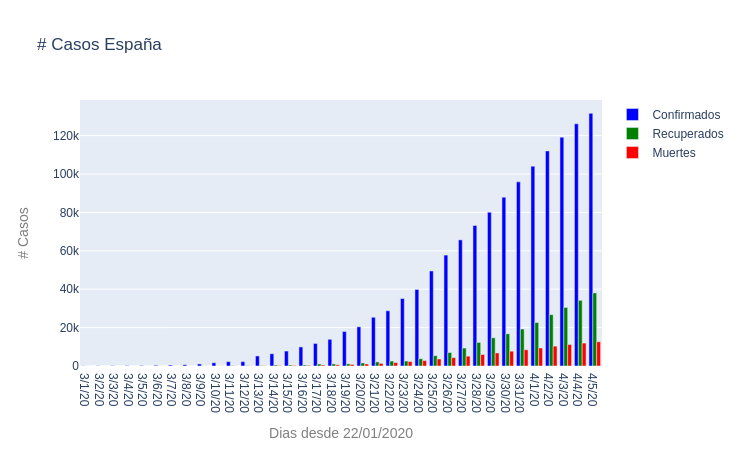

In [26]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)

# line recovered
# data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']

trace1 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Recuperados"
)

# data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
    name="Muertes"
)

# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

## China/Singapore/Spain comparative

In [1]:
#x = range(0, int(confirm_trans_filter.count()))
x = range(0, int(china_confirm_trans.count()))
days = []
for n in x:
    days.append(n)
print(days)

NameError: name 'china_confirm_trans' is not defined

/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




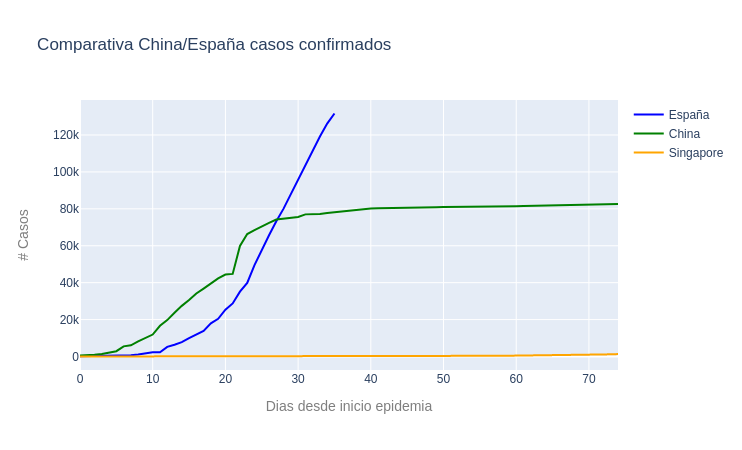

In [67]:
#data 
x = days
y = confirm_trans_filter['y']


# Spain confirmed lines
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="España"
)

# China confirmed line
# data 
x = days
y = china_confirm_trans['China']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="China"
)


# Singapore confirmed line
# data 
x = days
y = singapore_confirm_trans['Singapore']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='orange'
    ),
    name="Singapore"
)

# layout
layout = go.Layout(title = "Comparativa China/España casos confirmados",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde inicio epidemia', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Confirmed cases logarithmic scale

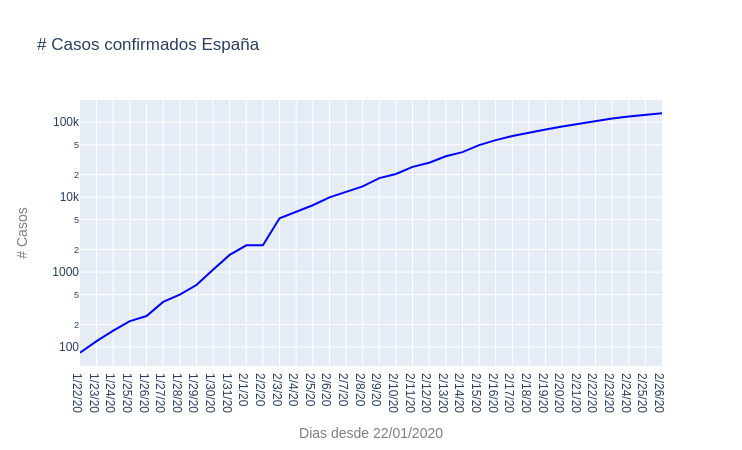

In [68]:
#data 
x = confirm_trans.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)



# layout
layout = go.Layout(title = "# Casos confirmados España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(yaxis_type="log")
iplot(fig)

### Plot recovered cases in Spain

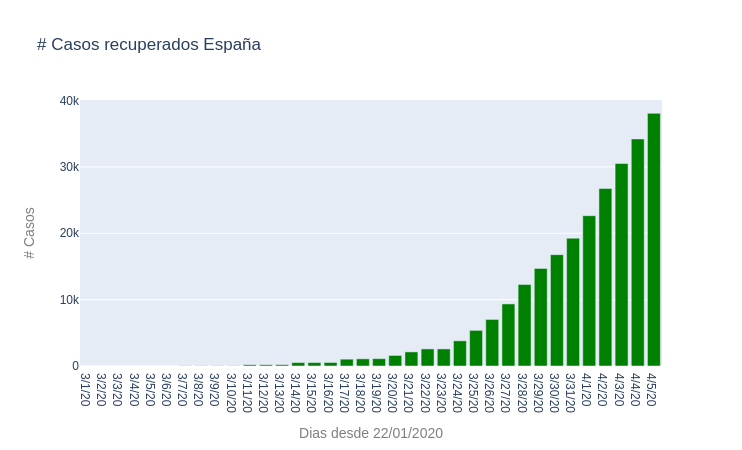

In [69]:
#data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
)


# layout
layout = go.Layout(title = "# Casos recuperados España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Death cases in Spain

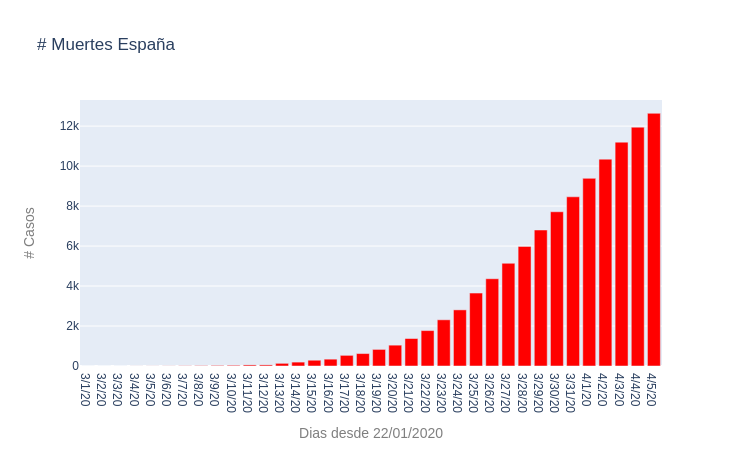

In [70]:
#data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
)


# layout
layout = go.Layout(title = "# Muertes España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Recovered and deaths

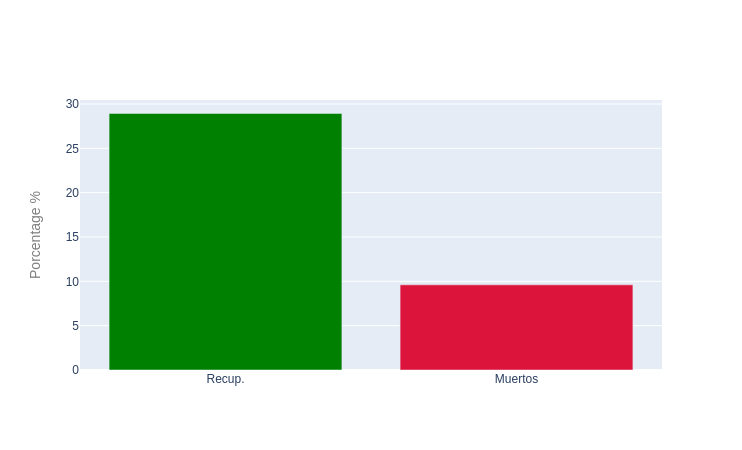

In [71]:
#data 
x = ("Recup.", "Muertos")
y = (rc, rd)

#Colors
colors = ['green',] * 5
colors[1] = 'crimson'

# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=colors
    ),
)


# layout
layout = go.Layout(
    yaxis=dict(title = go.layout.yaxis.Title(text='Porcentage %', 
                                             font=dict(size=14, 
                                             color='#7f7f7f')))
)

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Exponential Growth

In [72]:
# Create column of difference between Nd and Nd-1
confirm_trans_filter['changes'] = confirm_trans_filter.y - confirm_trans_filter.y.shift(1)
confirm_trans_filter.tail()

/home/emi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y,changes
4/1/20,104118,8195.0
4/2/20,112065,7947.0
4/3/20,119199,7134.0
4/4/20,126168,6969.0
4/5/20,131646,5478.0


In [73]:
# Create column of difference between Nd changes and Nd-1 changes
confirm_trans_filter['Growth Factor'] = confirm_trans_filter.changes / confirm_trans_filter.changes.shift(1)
confirm_trans_filter.tail()



/home/emi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y,changes,Growth Factor
4/1/20,104118,8195.0,1.028618
4/2/20,112065,7947.0,0.969738
4/3/20,119199,7134.0,0.897697
4/4/20,126168,6969.0,0.976871
4/5/20,131646,5478.0,0.786053


In [74]:
# Clean inf data
confirm_trans_filter['Growth Factor'] = confirm_trans_filter['Growth Factor'].replace(np.inf, 0)

/home/emi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plot Growth Factor

/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




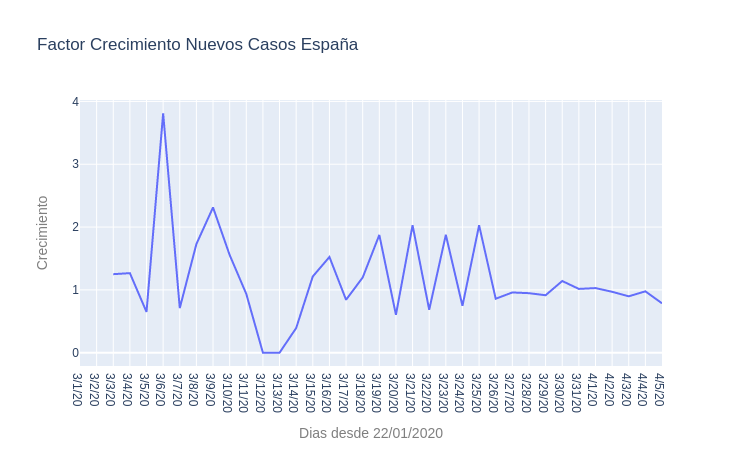

In [75]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['Growth Factor']
#mean = mean(y)

# line
trace = go.Line(
    x=x,
    y=y,
)


# layout
layout = go.Layout(title = "Factor Crecimiento Nuevos Casos España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='Crecimiento', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

In [ ]:
#Create a 100-day series

x2 = []
x = confirm_trans.index.values

for num in range(1,100):
#Get the last date 
    datetime_object = datetime.datetime.strptime(x[-1], '%m/%d/%y') + datetime.timedelta(days=1)
    #Time to string
    d = datetime_object.strftime("%m/%d/%y")
    print(d)

    #Add it to new array
    x2.append(d)

    #Concatenate both arrays
    x = np.concatenate((x, x2))


# Forecasting


## SARIMA Model for Time Series Forecasting 

In [96]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Creating confirmed train and test set 

In [97]:
df0 = confirm_trans_filter

In [98]:
# Delete columns
df = df0.drop(['changes', 'Growth Factor'], axis=1)

In [99]:
# split into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

Let’s visualize the data (train and test together) to know how it varies over a time period.

/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




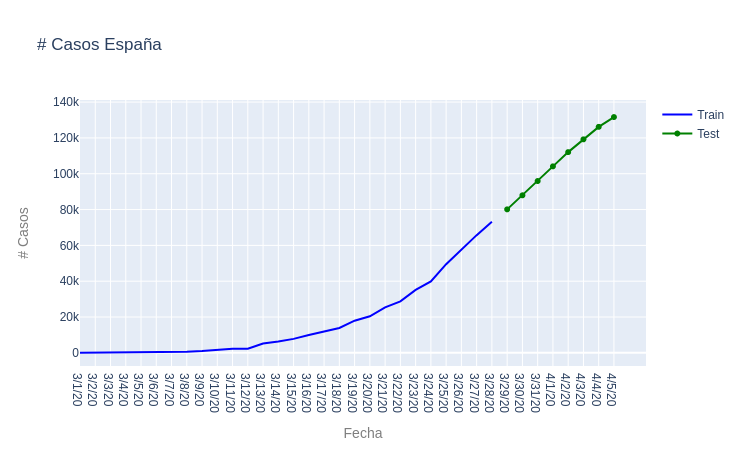

In [100]:
#data 
x = train.index
y = train['y']

# Train line 
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Train"
)

# Test line
# data 
x = test.index
y = test['y']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Test"
)


# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Fecha', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Training

In [101]:
# Dates
start_date = test.index[0]
end_date = test.index[-1]

In [102]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [103]:
#warnings.filterwarnings("ignore")
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.y, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=start_date, end=end_date, dynamic=True)


/home/emi/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/emi/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/emi/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/emi/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/emi/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




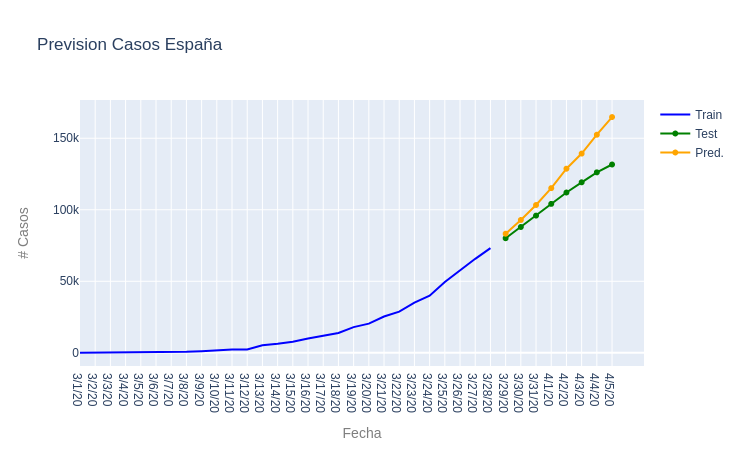

In [104]:
#data 
x = train.index
y = train['y']

# Train line 
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Train"
)

# Test line
# data 
x = test.index
y = test['y']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Test"
)

# Prediccion line
# data 
x = y_hat_avg.index
y = y_hat_avg['SARIMA']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='orange'
    ),
    name="Pred."
)

# layout
layout = go.Layout(title = "Prevision Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Fecha', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### RMSE

In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.y, y_hat_avg.SARIMA))
print('RMSE:', rms)


RMSE: 18312.506135980213


## Evaluate SARIMA Mode

### Iterate SARIMA Parameters
https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

In [106]:
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 

In [107]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [108]:
 # split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]


In [109]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

In [110]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

In [111]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

In [113]:
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

### If you look at tsa stats documentation you will see that if you want to operate with quarterly data - you have to assign the last parameter (s) - value of 4. Monthly - 12. It means that if you want to operate with weekly data seasonal_order should look like this

seasonal_order=(1, 1, 1, 52)

daily data will be

seasonal_order=(1, 1, 1, 365)

https://stackoverflow.com/questions/44235558/statespace-sarimax-model-why-the-model-use-all-the-data-to-train-mode-and-pred

In [ ]:
data = pd.Series(df['y'])
print(data.shape)
# data split
n_test = 6
# model configs
cfg_list = sarima_configs(seasonal=[0,2,6])
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

(36,)
 > Model[[(0, 0, 0), (0, 0, 0, 52), 'n']] 115511.745


In [ ]:
# We can see that the best result was an RMSE of about 432.35 with the following configuration:

    Order: (1, 1, 0)
    Seasonal Order: (0, 0, 1, 2)
    Trend Parameter: ‘n’ (no trend)
